# Lab 5: FEATURE SELECTION

Suggested Solution

This notebook builds on Tutoial 4 by introducing feature selection into the process of selecting the best classifier for a binary classification problem. It also demonstrates how to split a dataset into a training and test sets and use the test set for evaluation.

The feature selection method applied here is Recursive Feature Elimination (RFE) as demonstrated in the tutorial at https://machinelearningmastery.com/feature-selection-in-python-with-scikit-learn/.

In this demonstration we use a modified version of the seeds dataset (see https://archive.ics.uci.edu/ml/datasets/seeds), which is the same dataset used in Tutorial 4.

# A. Preparation

## Import Python Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

## Load and Prepare the Dataset for Training and Evaluation

In [2]:
df = pd.read_csv('./winequality_red.csv')
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [3]:
# target attribute
target_attribute_name = 'quality'
target = df[target_attribute_name]

# predictor attributes
predictors = df.drop(target_attribute_name, axis=1).values

Split the dataset into a training (80%) and test (20%) datasets.

In [4]:
# pepare independent stratified data sets for training and test of the final model
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.20, shuffle=True, stratify=target)

Scale all predictor values to the range [0, 1]. Note the target attribute is already binary. This is a useful pre-processing technique to ensure that all attributes are treated equally during training. Applying a scaler (MinMaxScaler) can be seen as another parameter of the ML to be applied. It may or may not improve the accuracy of the trained model, which can be evaluated with a test dataset. 

Note that the MinMaxScaler is applied separately to the training and the testing datasets. 
This is to ensure that this transformation when performed on the testing dataset is not influnced by the training dataset.

In [5]:
min_max_scaler = preprocessing.MinMaxScaler()

In [6]:
predictors_train = min_max_scaler.fit_transform(predictors_train)
predictors_test = min_max_scaler.fit_transform(predictors_test)

# B. Feature Selection

## Apply RFE with SVM for Selecting the Features

In [7]:
# create a base classifier used to evaluate a subset of attributes
estimatorSVR = svm.SVR(kernel="linear")
selectorSVR = RFE(estimatorSVR, 3)
selectorSVRfit = selectorSVR.fit(predictors_train, target_train)
# summarize the selection of the attributes
print(selectorSVRfit.support_)
print(selectorSVRfit.ranking_)

[False  True False False False False False False False  True  True]
[4 1 9 6 3 8 2 5 7 1 1]


## Apply RFE with Logistic Regression for Selecting Features

In [8]:
# create a base classifier used to evaluate a subset of attributes
estimatorLR = LogisticRegression(solver='lbfgs')
# create the RFE model and select 3 attributes
selectorLR = RFE(estimatorLR, 3)
selectorLRfit = selectorLR.fit(predictors_train, target_train)
# summarize the selection of the attributes
print(selectorLRfit.support_)
print(selectorLRfit.ranking_)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/a

[False  True False False False False  True False False False  True]
[3 1 5 9 7 8 1 4 6 2 1]


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


## Evaluate on the Test Dataset

### Apply the selectors to prepare a training dataset only with the selected features.

__Note:__ The same selectors are applied to the test dataset. However, it is important that the test dataset was not used by (it's invisible to) the selectors. 

In [9]:
predictors_train_SVRselected = selectorSVRfit.transform(predictors_train)
predictors_test_SVRselected = selectorSVRfit.transform(predictors_test)

In [10]:
predictors_train_LRselected = selectorLRfit.transform(predictors_train)
predictors_test_LRselected = selectorLRfit.transform(predictors_test)

### Train and evaluate SVM classifiers with both the selected features and all features 

Here we train three models:
* model1 - with the features selected by SVM
* model2 - with the features selected by Logistic Regression
* model3 - with all features (i.e. without feature selection)

In [11]:
classifier = svm.SVC(gamma='auto')

In [12]:
model1 = classifier.fit(predictors_train_SVRselected, target_train)
model1.score(predictors_test_SVRselected, target_test)

0.525

In [13]:
model2 = classifier.fit(predictors_train_LRselected, target_train)
model2.score(predictors_test_LRselected, target_test)

0.503125

In [14]:
model3 = classifier.fit(predictors_train, target_train)
model3.score(predictors_test, target_test)

0.53125

# C. Run Multiple Times

When you execute this code again, it is very likely to get different results.

To get more accurate results, accounting for the variance in the results, it is better to run the whole experiment multiple times and measure the variance in the results. Then pick the model that gives better results.

In [15]:
ITERATIONS = 5

accuracies_SVR = np.array([])
accuracies_LR = np.array([])
accuracies_ALL = np.array([])

for i in range(ITERATIONS):
    
    predictors_train, predictors_test, target_train, target_test = train_test_split(
                predictors, target, test_size=0.20, shuffle=True, stratify=target)    

    predictors_train = min_max_scaler.fit_transform(predictors_train)
    predictors_test = min_max_scaler.fit_transform(predictors_test)
        
    selectorSVRfit = selectorSVR.fit(predictors_train, target_train)
    selectorLRfit = selectorLR.fit(predictors_train, target_train)
    
    predictors_train_SVRselected = selectorSVRfit.transform(predictors_train)
    predictors_test_SVRselected = selectorSVRfit.transform(predictors_test)
    
    predictors_train_LRselected = selectorLRfit.transform(predictors_train)
    predictors_test_LRselected = selectorLRfit.transform(predictors_test)
    
    model1 = classifier.fit(predictors_train_SVRselected, target_train)
    accuracies_SVR = np.append(accuracies_SVR, model1.score(predictors_test_SVRselected, target_test))
    
    model2 = classifier.fit(predictors_train_LRselected, target_train)
    accuracies_LR = np.append(accuracies_LR, model2.score(predictors_test_LRselected, target_test))
    
    model3 = classifier.fit(predictors_train, target_train)
    accuracies_ALL = np.append(accuracies_ALL, model3.score(predictors_test, target_test))

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/a

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/a

In [16]:
# Compare the statistics of the accuracies across all iterations
accuracies_df = pd.DataFrame(
    data={'SVR Features' : accuracies_SVR, 'LR Features' : accuracies_LR, 'ALL Features' : accuracies_ALL})

In [17]:
accuracies_df.describe()

,SVR Features,LR Features,ALL Features
count,5.000000,5.000000,5.000000
mean,0.575000,0.570000,0.580625
std,0.026146,0.039934,0.039922
min,0.537500,0.521875,0.518750
25%,0.562500,0.550000,0.568750
50%,0.581250,0.556250,0.593750
75%,0.587500,0.603125,0.596875
max,0.606250,0.618750,0.625000


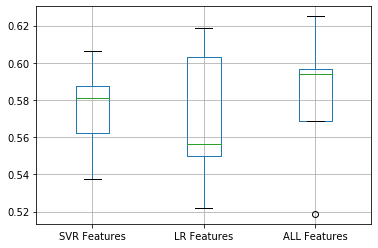

In [18]:
accuracies_df.boxplot()

# D. Pipelines

The process outlined in this tutorial can be further authomated with the use of scikit-learn pipelines. As an exercise build at least two pipelines for training classifiers for the seeds dataset. Each pipeline should include a feature-selection method, and the feature-selection method in pipeline 1 should be different from the feature-selection method in pipeline 2.

The code below follows the example at:

* https://machinelearningmastery.com/automate-machine-learning-workflows-pipelines-python-scikit-learn/

In [19]:
# Create the necessary objects for inclusion in the pipeline
scaler = preprocessing.MinMaxScaler()

In [20]:
model1 = Pipeline([('scaler', min_max_scaler), ('feature_selector', selectorSVR), ('classifier', classifier)])
model2 = Pipeline([('scaler', min_max_scaler), ('feature_selector', selectorLR), ('classifier', classifier)])
model3 = Pipeline([('scaler', min_max_scaler), ('classifier', classifier)])

In [21]:
# evaluate pipelines
seed = 7
kfold = KFold(n_splits=10, random_state=seed)

accuracies_SVR = cross_val_score(model1, predictors, target, cv=kfold)
accuracies_LR = cross_val_score(model2, predictors, target, cv=kfold)
accuracies_ALL = cross_val_score(model3, predictors, target, cv=kfold)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/a

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/a

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/a

In [22]:
# Compare the statistics of the accuracies across all iterations
accuracies_df = pd.DataFrame(data={'SVR Features' : accuracies_SVR, 'LR Features' : accuracies_LR, 'ALL Features' : accuracies_ALL})

In [23]:
accuracies_df.describe()

,SVR Features,LR Features,ALL Features
count,10.000000,10.000000,10.000000
mean,0.551592,0.560330,0.559080
std,0.058577,0.067916,0.073803
min,0.481250,0.481250,0.481250
25%,0.504687,0.507075,0.498438
50%,0.536085,0.540625,0.536026
75%,0.596875,0.603125,0.615625
max,0.643750,0.693750,0.700000


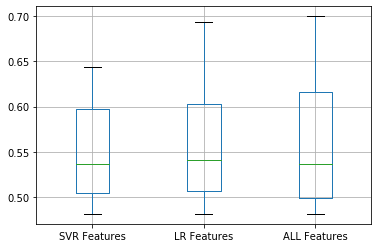

In [24]:
accuracies_df.boxplot()